In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# 1. Unzip the dataset
zip_path = "/content/drive/MyDrive/Dataset/archive (15).zip"
extract_path = "/content/Maize_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted!")

# 2. Browse the folder structure
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")

# 3. Count images per class
from collections import defaultdict

image_counts = defaultdict(int)

for root, dirs, files in os.walk(extract_path):
    class_name = os.path.basename(root)
    image_counts[class_name] += len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print("\n📊 Images per class:")
for cls, count in image_counts.items():
    print(f"{cls}: {count}")


✅ Dataset extracted!
Maize_Dataset/
    data/
        Blight/
            Corn_Blight (186).JPG
            Corn_Blight (809).JPG
            Corn_Blight (426).JPG
            Corn_Blight (396).JPG
            Corn_Blight (750).JPG
        Gray_Leaf_Spot/
            Corn_Gray_Spot (532).JPG
            Corn_Gray_Spot (117).JPG
            Corn_Gray_Spot (286).JPG
            Corn_Gray_Spot (307).JPG
            Corn_Gray_Spot (555).JPG
        Common_Rust/
            Corn_Common_Rust (973).JPG
            Corn_Common_Rust (199).JPG
            Corn_Common_Rust (505).JPG
            Corn_Common_Rust (396).JPG
            Corn_Common_Rust (860).JPG
        Healthy/
            Corn_Health (115).jpg
            Corn_Health (712).jpg
            Corn_Health (31).jpg
            Corn_Health (949).jpg
            Corn_Health (808).jpg

📊 Images per class:
Maize_Dataset: 0
data: 0
Blight: 1146
Gray_Leaf_Spot: 574
Common_Rust: 1306
Healthy: 1162


In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Paths
dataset_dir = "/content/Maize_Dataset/data"
output_dir = "/content/Maize_Dataset/balanced_data"

# Make new balanced directory
os.makedirs(output_dir, exist_ok=True)

# Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Get class counts
class_counts = {cls: len(os.listdir(os.path.join(dataset_dir, cls)))
                for cls in os.listdir(dataset_dir)}

max_count = max(class_counts.values())
print("📊 Original class counts:", class_counts, "Target =", max_count)

# Function to balance classes
for cls, count in class_counts.items():
    src_dir = os.path.join(dataset_dir, cls)
    dst_dir = os.path.join(output_dir, cls)
    os.makedirs(dst_dir, exist_ok=True)

    # Copy original images
    for fname in os.listdir(src_dir):
        os.system(f"cp '{os.path.join(src_dir, fname)}' '{os.path.join(dst_dir, fname)}'")

    # If class has fewer images, augment
    if count < max_count:
        print(f"⚡ Augmenting {cls}: {count} → {max_count}")
        imgs = os.listdir(src_dir)
        i = 0
        while count < max_count:
            img_path = os.path.join(src_dir, imgs[i % len(imgs)])
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Generate 1 augmented image
            for batch in datagen.flow(x, batch_size=1,
                                      save_to_dir=dst_dir,
                                      save_prefix=cls,
                                      save_format='jpg'):
                count += 1
                break
            i += 1

print("\n✅ Balanced dataset created at:", output_dir)


📊 Original class counts: {'Blight': 1146, 'Gray_Leaf_Spot': 574, 'Common_Rust': 1306, 'Healthy': 1162} Target = 1306
⚡ Augmenting Blight: 1146 → 1306
⚡ Augmenting Gray_Leaf_Spot: 574 → 1306
⚡ Augmenting Healthy: 1162 → 1306

✅ Balanced dataset created at: /content/Maize_Dataset/balanced_data


In [4]:
extract_path = "/content/Maize_Dataset/balanced_data"

# 2. Browse the folder structure
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")

# 3. Count images per class
from collections import defaultdict

image_counts = defaultdict(int)

for root, dirs, files in os.walk(extract_path):
    class_name = os.path.basename(root)
    image_counts[class_name] += len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

print("\n📊 Images per class:")
for cls, count in image_counts.items():
    print(f"{cls}: {count}")

balanced_data/
    Blight/
        Corn_Blight (186).JPG
        Corn_Blight (809).JPG
        Corn_Blight (426).JPG
        Blight_0_9299.jpg
        Corn_Blight (396).JPG
    Gray_Leaf_Spot/
        Gray_Leaf_Spot_0_8987.jpg
        Corn_Gray_Spot (532).JPG
        Corn_Gray_Spot (117).JPG
        Gray_Leaf_Spot_0_8320.jpg
        Gray_Leaf_Spot_0_5102.jpg
    Common_Rust/
        Corn_Common_Rust (973).JPG
        Corn_Common_Rust (199).JPG
        Corn_Common_Rust (505).JPG
        Corn_Common_Rust (396).JPG
        Corn_Common_Rust (860).JPG
    Healthy/
        Corn_Health (115).jpg
        Corn_Health (712).jpg
        Corn_Health (31).jpg
        Corn_Health (949).jpg
        Corn_Health (808).jpg

📊 Images per class:
balanced_data: 0
Blight: 1304
Gray_Leaf_Spot: 1272
Common_Rust: 1306
Healthy: 1305


In [5]:
import shutil

# Path of balanced dataset
folder_path = "/content/Maize_Dataset/balanced_data"

# Output zip file name
zip_path = "/content/maize_balanced_data.zip"

# Create zip
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

print("✅ Zipping done:", zip_path)


✅ Zipping done: /content/maize_balanced_data.zip


In [6]:
# Move final dataset ZIP into Google Drive
shutil.move("/content/maize_balanced_data.zip",
            "/content/drive/MyDrive/Dataset/maize_balanced_data.zip")

print("✅ File saved to Google Drive: /MyDrive/maize_balanced_data.zip")


✅ File saved to Google Drive: /MyDrive/maize_balanced_data.zip


Found 5187 files belonging to 4 classes.
Using 4150 files for training.
Found 5187 files belonging to 4 classes.
Using 1037 files for validation.
✅ Classes: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - accuracy: 0.6872 - loss: 0.7941 - val_accuracy: 0.9026 - val_loss: 0.2794
Epoch 2/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 85ms/step - accuracy: 0.8917 - loss: 0.2998 - val_accuracy: 0.9094 - val_loss: 0.2305
Epoch 3/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9165 - loss: 0.2449 - val_accuracy: 0.9229 - val_loss: 0.1986
Epoch 4/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9159 - loss: 0.2224 - val_accuracy: 0.9209 - val_loss: 0.1952
Epoch 5/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9241 - loss: 0.2074 - val_accuracy: 0.9248 - val_loss: 0.1896
Epoch 6/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.9277 - loss: 0.203

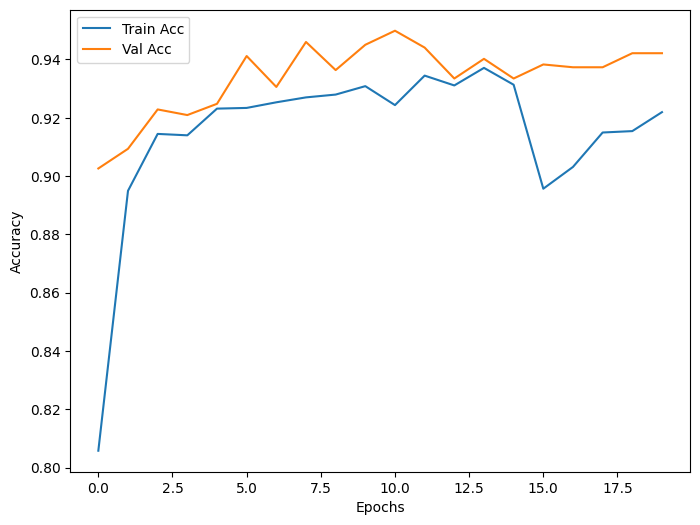

✅ Model saved as maize_disease_model.h5


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# ==============================
# 1. Paths & Parameters
# ==============================
data_dir = "/content/Maize_Dataset/balanced_data"
img_size = (224, 224)  # EfficientNet input size
batch_size = 32
epochs = 15

# ==============================
# 2. Load Dataset
# ==============================
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("✅ Classes:", class_names)

# ==============================
# 3. Performance Optimizations
# ==============================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ==============================
# 4. Data Augmentation
# ==============================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

# ==============================
# 5. Transfer Learning Model
# ==============================
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=img_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze base layers initially

inputs = tf.keras.Input(shape=img_size + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# ==============================
# 6. Compile
# ==============================
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# ==============================
# 7. Train
# ==============================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# ==============================
# 8. Fine-Tune (Unfreeze some layers)
# ==============================
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20  # unfreeze last 20 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # lower LR
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# ==============================
# 9. Evaluate
# ==============================
loss, acc = model.evaluate(val_ds)
print(f"\n✅ Final Model Accuracy: {acc*100:.2f}%")

# ==============================
# 10. Plot Training Curves
# ==============================
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ==============================
# 11. Save Model
# ==============================
model.save("maize_disease_model.h5")
print("✅ Model saved as maize_disease_model.h5")


📊 Classification Report:
                precision    recall  f1-score   support

        Blight       0.86      0.91      0.89       239
   Common_Rust       0.97      0.98      0.98       252
Gray_Leaf_Spot       0.93      0.89      0.91       289
       Healthy       1.00      0.99      1.00       257

      accuracy                           0.94      1037
     macro avg       0.94      0.94      0.94      1037
  weighted avg       0.94      0.94      0.94      1037



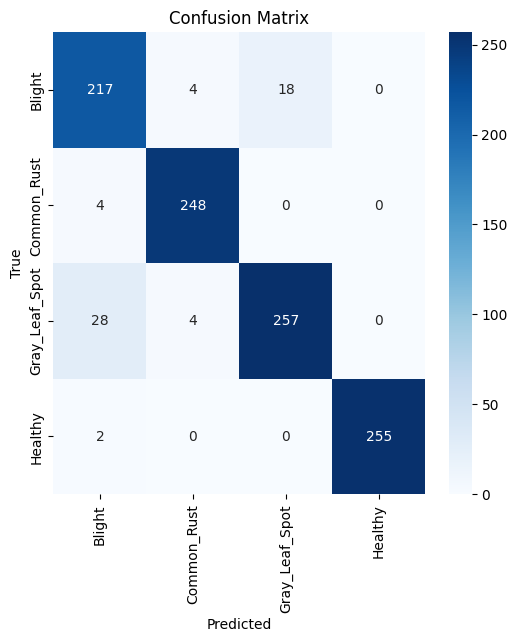

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels & predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
🖼️ Image: Corn_Gray_Spot (104).JPG
✅ Predicted: Gray_Leaf_Spot (88.74%)


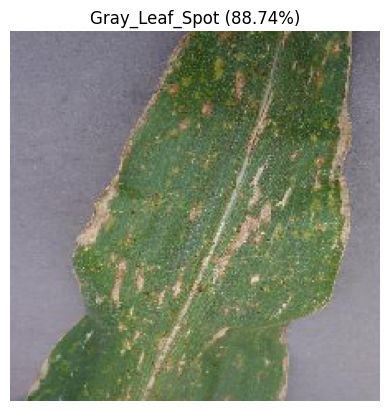

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
🖼️ Image: Corn_Health (1004).jpg
✅ Predicted: Healthy (99.36%)


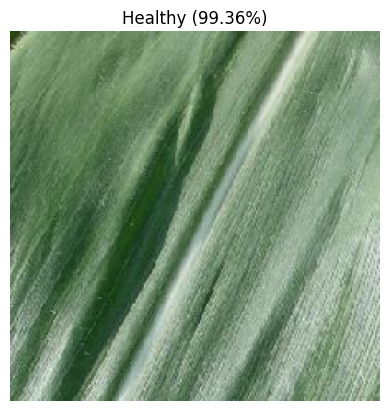

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
🖼️ Image: Blight_0_1553.jpg
✅ Predicted: Blight (57.42%)


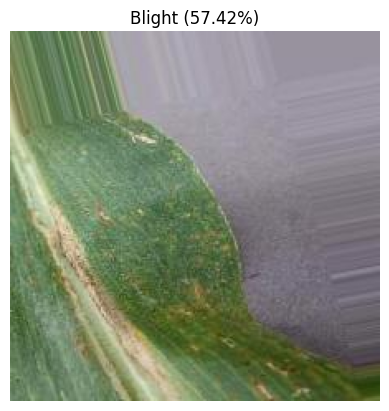

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
🖼️ Image: Corn_Common_Rust (1004).JPG
✅ Predicted: Common_Rust (99.98%)


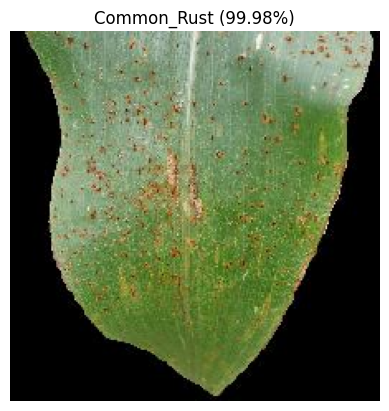

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🖼️ Image: Corn_Gray_Spot (124).JPG
✅ Predicted: Gray_Leaf_Spot (93.47%)


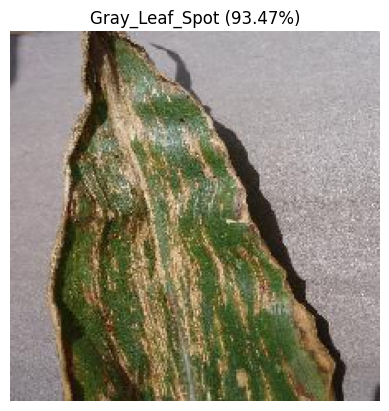

In [11]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)  # Resize to (224,224)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    preds = model.predict(img_array)
    predicted_class = class_names[np.argmax(preds)]
    confidence = np.max(preds) * 100

    print(f"🖼️ Image: {os.path.basename(img_path)}")
    print(f"✅ Predicted: {predicted_class} ({confidence:.2f}%)")

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.show()

# Example usage
predict_image("/content/Maize_Dataset/balanced_data/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG")
predict_image("/content/Maize_Dataset/balanced_data/Healthy/Corn_Health (1004).jpg")
predict_image("/content/Maize_Dataset/balanced_data/Blight/Blight_0_1553.jpg")
predict_image("/content/Maize_Dataset/balanced_data/Common_Rust/Corn_Common_Rust (1004).JPG")
predict_image("/content/Maize_Dataset/balanced_data/Gray_Leaf_Spot/Corn_Gray_Spot (124).JPG")



In [15]:
# Build inference model (no augmentation)
inference_inputs = tf.keras.Input(shape=(224,224,3))
x = tf.keras.applications.efficientnet.preprocess_input(inference_inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

inference_model = tf.keras.Model(inference_inputs, outputs)

# Copy weights from trained model
inference_model.set_weights(model.get_weights())

# Save for deployment
inference_model.save("/content/updated_maize_disease_efficientnetb0.h5")
print("✅ Inference model saved (without augmentation).")


✅ Inference model saved (without augmentation).


In [16]:
from tensorflow.keras.models import load_model

# Reload saved inference model
inference_model = load_model("/content/updated_maize_disease_efficientnetb0.h5")
print("✅ Inference model loaded successfully!")


✅ Inference model loaded successfully!


🖼️ Image: Corn_Gray_Spot (104).JPG
✅ Predicted: Gray_Leaf_Spot (61.03%)


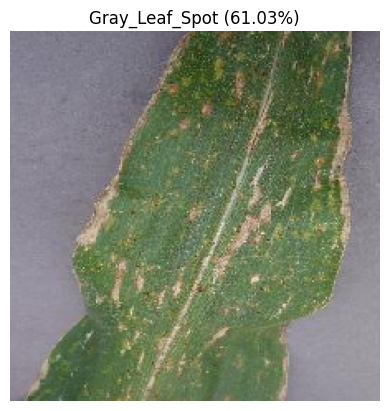

🖼️ Image: Corn_Health (1004).jpg
✅ Predicted: Healthy (96.58%)


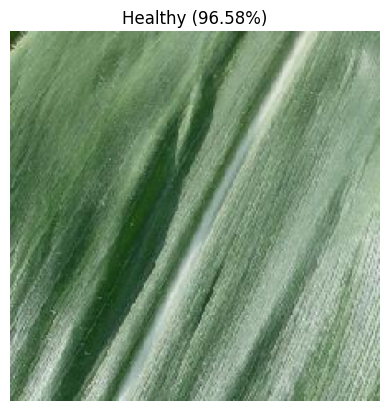

🖼️ Image: Blight_0_5995.jpg
✅ Predicted: Blight (55.17%)


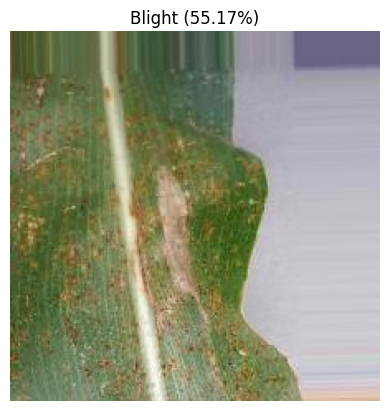

🖼️ Image: Corn_Common_Rust (1004).JPG
✅ Predicted: Common_Rust (99.93%)


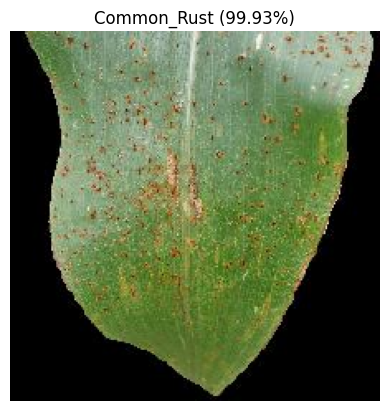

🖼️ Image: Corn_Gray_Spot (124).JPG
✅ Predicted: Gray_Leaf_Spot (97.90%)


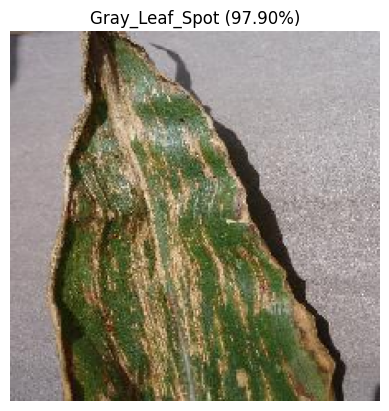

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

def predict_image_inference(img_path, model, class_names, img_size=(224,224)):
    # Load & preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Predict
    preds = model.predict(img_array, verbose=0)
    predicted_class = class_names[np.argmax(preds)]
    confidence = np.max(preds) * 100

    # Print result
    print(f"🖼️ Image: {os.path.basename(img_path)}")
    print(f"✅ Predicted: {predicted_class} ({confidence:.2f}%)")

    # Show image with prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.show()


# Example test images
predict_image_inference("/content/Maize_Dataset/balanced_data/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG", inference_model, class_names)
predict_image_inference("/content/Maize_Dataset/balanced_data/Healthy/Corn_Health (1004).jpg", inference_model, class_names)
predict_image_inference("/content/Maize_Dataset/balanced_data/Blight/Blight_0_5995.jpg", inference_model, class_names)
predict_image_inference("/content/Maize_Dataset/balanced_data/Common_Rust/Corn_Common_Rust (1004).JPG", inference_model, class_names)
predict_image_inference("/content/Maize_Dataset/balanced_data/Gray_Leaf_Spot/Corn_Gray_Spot (124).JPG", inference_model, class_names)